<a href="https://colab.research.google.com/github/dohyun93/hongong_mldl/blob/main/3_1_K_%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3-1. K-최근접 회귀

2장에서는 K-최근접 '분류'를 공부해보았다.

> '분류'란 주어진 데이터가 어떤 클래스에 속하는지를 추론하는 것을 말했다.

> **'회귀'란 주어진 데이터가 어떤 '값'이라는 결과를 추론하는 것을 말한다.**

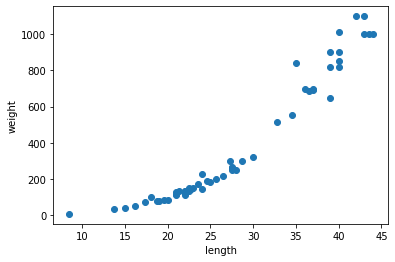

In [2]:
# 농어 데이터를 갖고 회귀를 해보자
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [4]:
# 위 데이터를 나눠보자
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

print(train_input.shape)

(42,)


In [14]:
# 1D np 배열을 2D로 reshape.
train_input = train_input.reshape(-1, 1)
#print(train_input)

print(test_input.shape)
print(test_input.shape)
print(test_target.shape)

# 나머지 훈련세트의 타겟과 테스트세트의 인풋,타겟들도 2D로 reshape해준다.
train_target = train_target.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
test_target = test_target.reshape(-1, 1)

print(train_input.shape)
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)

(14, 1)
(14, 1)
(14, 1)
(42, 1)
(42, 1)
(14, 1)
(14, 1)


# 결정계수 ($R^2$)

> scikit learn 에서 k-최근접이웃 회귀 알고리즘을 구현한 클래스는 KNeighborsRegressor 이다.

In [13]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)
print(knr.score(test_input, test_target))

0.992809406101064


> 위 knr.score으로 k최근접이웃회귀의 성능을 확인했다.

> 최근접이웃분류의 경우 정확하게 샘플을 분류한 개수의 비율을 score함수의 결과로 확인했다.

> 최근접이웃회귀의 경우 결정계수의 값으로 score 함수의 리턴값을 결정한다.

$R^2 = 1 - \frac{(타겟-예측)^2의 합}{(타겟-타겟평균)^2의 합}$

> **즉, 예측이 타겟에 가까울 수록 분자가 0이 되므로 결정계수값이 1에 가까워진다.**

> 반면 예측이 타겟평균에 가까워질 경우 결정계수값이 0에 가까워진다.

# 타겟과 예측한 값 차이 - mean_absolute_error (MAE)

결정계수가 직감적으로 얼마나 좋은지 이해하기 어려우니 타겟과 예측한 값 차이를 구해보자

> MAE는 타깃과 예측의 절댓값 오차를 평균하여 반환하는 값이다.

In [15]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


> input (길이) 에 대해 prediction (무게) 를 회귀하는 모델의 MAE 메트릭 상 19g 평균오차를 보이는 것을 알 수 있다.



In [16]:
# 과대적합과 과소적합

# 여태까지 우리는 훈련세트로 학습을 하고, 테스트세트로 검증을 했다.
# 만약 훈련세트로 학습한 모델을 훈련세트로 검증하면 어떻게 될까?
# -> 만약 훈련세트의 score가 더 높다면: 오버피팅 가능성
# 이 경우 훈련세트에만 잘 맞는 모델이라 일반성이 없는 문제로 실제 데이터가 주어졌을 때 성능이 낮다.

# -> 만약 테스트세트의 score가 더 높거나
#    두 결과모두 너무 낮을 경우 : 언더피팅 가능성.
# 이 경우 모델이 너무 단순하여 훈련세트에 적절히 훈련되지 않은 경우.

print("훈련세트 평가결과: ", knr.score(train_input, train_target))
print("테스트세트 평가결과: ", knr.score(test_input, test_target))

훈련세트 평가결과:  0.9698823289099254
테스트세트 평가결과:  0.992809406101064


> 테스트 세트의 결과가 훈련세트의 결과보다 더 높으므로, 이는 언더피팅된 모델이라고 할 수 있다.

> 이 경우, 모델이 너무 단순하여 훈련세트를 잘 학습하지 못했다고 볼 수 있다. 즉, 모델을 더 복잡하게 만들면 된다.

> K최근접이웃회귀 알고리즘으로 모델을 더 복잡하게 만드는 방법은 이웃의 개수를 줄이는 것이다.

> 이웃의 개수를 줄이면 훈련세트의 국지적인 패턴에 민감해지고 복잡한 모델이 만들어지는 반면, 이웃의 개수를 늘리면 훈련세트의 일반적인 패턴을 따를 것이다.

> 기본적으로 sklearn.neighbors의 KNeighborsRegressor의 이웃개수는 5이나, 이를 3으로 줄여서 모델을 더 복잡하게 해보자.

In [19]:
knr.n_neighbors = 3

knr.fit(train_input, train_target)

print("훈련세트 평가결과: ", knr.score(train_input, train_target))
print("테스트세트 평가결과: ", knr.score(test_input, test_target))

훈련세트 평가결과:  0.9804899950518966
테스트세트 평가결과:  0.9746459963987609


> 훈련세트의 결과가 테스트세트의 결과보다 근소하게 더 높아 언더피팅 문제가 해소된 것으로 보인다.

> 또한 훈련세트의 결과가 테스트세트의 결과와 차이가 거의 없어 이 모델이 과대적합되지도 않은 것을 알 수 있다.

> 일반적인 성능을 내는 k최근접이웃회귀 모델을 개발했다!